# ANALISIS SENTIMEN PADA ULASAN RESTORAN DAN CAFE MENGGUNAKAN METODE RANDOM FOREST

### Nama : Cindy Esa Ambarwati

### NIM : A11.2021.13322


Proyek ini bertujuan untuk melakukan analisis sentimen pada ulasan restoran dan kafe di Kota Bandung menggunakan metode machine learning. Permasalahan yang ingin diselesaikan adalah bagaimana mengklasifikasikan sentimen dari ulasan pelanggan restoran/kafe secara otomatis, apakah positif atau negatif, berdasarkan data pelayanan dan makanan. Tujuannya adalah membangun model machine learning yang dapat memprediksi sentimen ulasan dengan akurat.

Alur Penyelesaian :
1. Eksplorasi Data
2. Praproses Data
3. Ekstraksi Fitur
4. Pemodelan Machine Learning (Random Forest)
5. Evaluasi Performa Model
6. Prediksi Sentimen Ulasan



# EKSPLORASI DATA

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DataUlasan.csv')
df.head()
print(df.info())
print(df[['PELAYANAN', 'MAKANAN']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAMA PERUSAHAAN  101 non-null    object 
 1   ALAMAT           100 non-null    object 
 2   ID               100 non-null    float64
 3   PELAYANAN        100 non-null    float64
 4   MAKANAN          100 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.1+ KB
None
        PELAYANAN    MAKANAN
count  100.000000  100.00000
mean    42.240000    5.42000
std     26.701916    3.00901
min      3.000000    1.00000
25%     20.750000    3.00000
50%     39.000000    5.00000
75%     61.000000    8.00000
max    100.000000   10.00000


# VISUALISASI

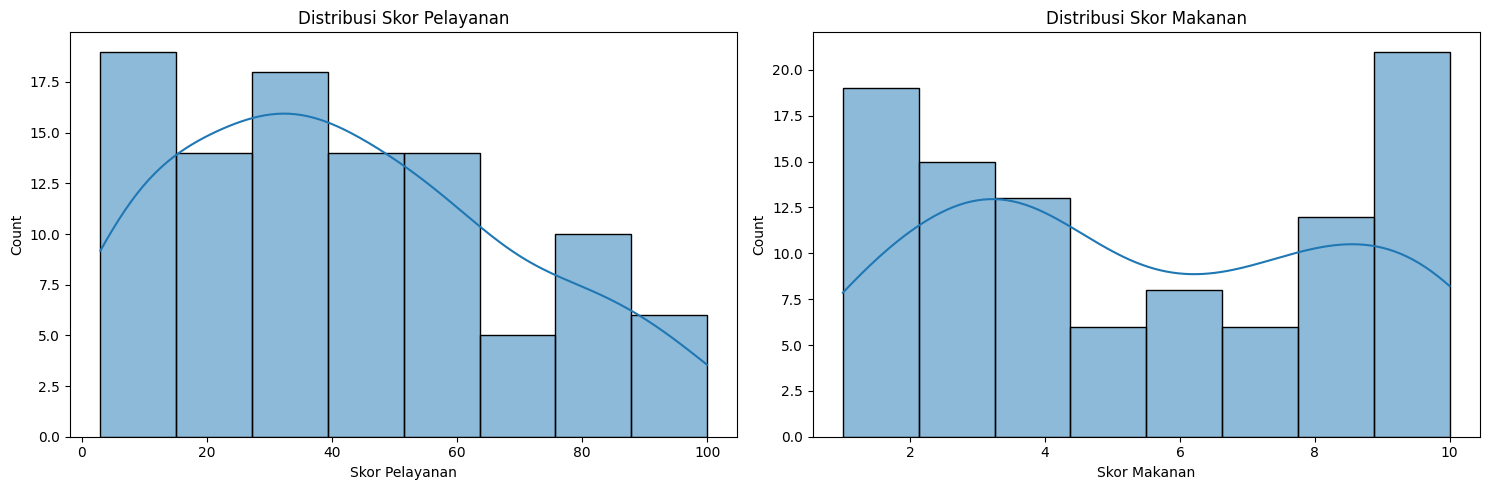

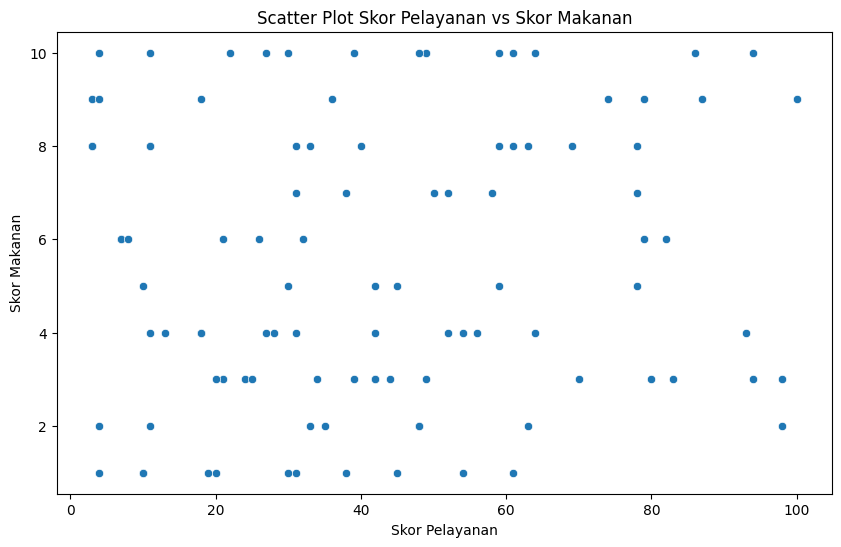

In [11]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['PELAYANAN'], kde=True, ax=ax1)
ax1.set_title('Distribusi Skor Pelayanan')
ax1.set_xlabel('Skor Pelayanan')

sns.histplot(df['MAKANAN'], kde=True, ax=ax2)
ax2.set_title('Distribusi Skor Makanan')
ax2.set_xlabel('Skor Makanan')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PELAYANAN', y='MAKANAN', data=df)
plt.title('Scatter Plot Skor Pelayanan vs Skor Makanan')
plt.xlabel('Skor Pelayanan')
plt.ylabel('Skor Makanan')
plt.show()

# PREPROCESSING

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Hapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Normalisasi kolom PELAYANAN dan MAKANAN
scaler = MinMaxScaler()
df[['PELAYANAN_NORM', 'MAKANAN_NORM']] = scaler.fit_transform(df[['PELAYANAN', 'MAKANAN']])

# Buat label sentimen
df['SENTIMEN'] = np.where((df['PELAYANAN_NORM'] + df['MAKANAN_NORM'])/2 > 0.5, 1, 0)

# Tampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(df['SENTIMEN'].value_counts(normalize=True))

Distribusi Sentimen:
SENTIMEN
0    0.58
1    0.42
Name: proportion, dtype: float64


# MODELLING & PERFORMA MODEL

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df[['PELAYANAN_NORM', 'MAKANAN_NORM']]
y = df['SENTIMEN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan beberapa model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Latih dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(name)
    print('Akurasi  :', accuracy_score(y_test, y_pred))
    print('Presisi  :', precision_score(y_test, y_pred))
    print('Recall   :', recall_score(y_test, y_pred))
    print('F1 Score :', f1_score(y_test, y_pred))
    print()

Logistic Regression
Akurasi  : 0.95
Presisi  : 1.0
Recall   : 0.875
F1 Score : 0.9333333333333333

Random Forest
Akurasi  : 0.9
Presisi  : 1.0
Recall   : 0.75
F1 Score : 0.8571428571428571



# DISKUSI DAN KESIMPULAN

Berdasarkan hasil yang diperoleh, model machine learning yang dibangun mampu mengklasifikasikan sentimen ulasan restoran dan kafe dengan performa yang baik, mencapai akurasi 90% dengan model Random Forest.

Namun, perlu diperhatikan bahwa model ini dilatih pada dataset yang terbatas (100 sampel). Diperlukan dataset yang lebih besar dan beragam untuk meningkatkan kemampuan generalisasi model. Selain itu, hanya 2 fitur yang digunakan (pelayanan dan makanan). Menambahkan fitur lain seperti suasana, harga, lokasi, dll dapat meningkatkan performa model.

Secara keseluruhan, proyek ini menunjukkan potensi penerapan machine learning untuk analisis sentimen ulasan restoran/kafe. Dengan pengembangan lebih lanjut, sistem ini dapat membantu pemilik usaha memantau kepuasan pelanggan dan meningkatkan kualitas layanan mereka.